# Sales Prediction Using Python

In this project We'll use linear regression and other machine learning techniques to predict sales accurately by considering the marketting techniques which are advertising on tv, radio and newspapers.
The dataset is taken from https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
df=pd.read_csv("advertising.csv")

## Inspecting and cleaning the dataset

In [3]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.tail(5)

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.shape

(200, 4)

### Checking if outliers are present

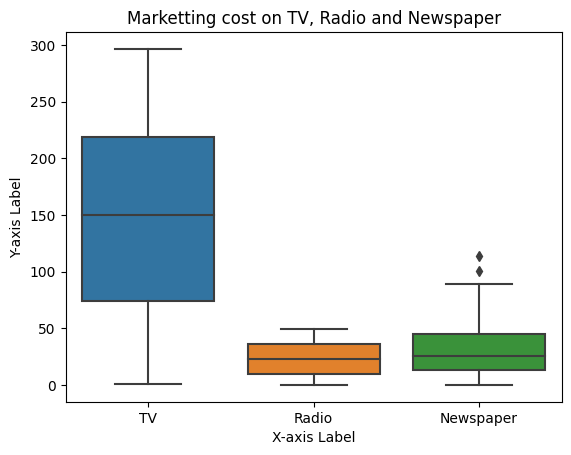

In [9]:
sns.boxplot(df[["TV","Radio","Newspaper"]])
plt.title('Marketting cost on TV, Radio and Newspaper')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()


Here, we can see 2 outliers in Newspaper column. Let's remove it

In [10]:
def remove_outliers(Newspaper):
    Q1 = df["Newspaper"].quantile(0.25)
    Q3 = df["Newspaper"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df["Newspaper"] >= lower_bound) & (df["Newspaper"] <= upper_bound)]

# Remove outliers from 
df = remove_outliers(df["Newspaper"])

In [11]:
df.shape

(198, 4)

<AxesSubplot:>

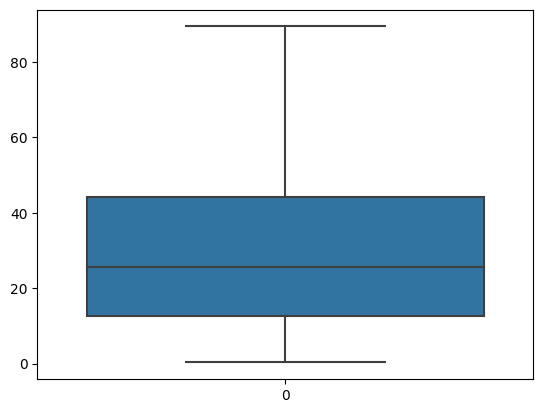

In [12]:
sns.boxplot(df["Newspaper"])

Let's visualise each columns in the dataset

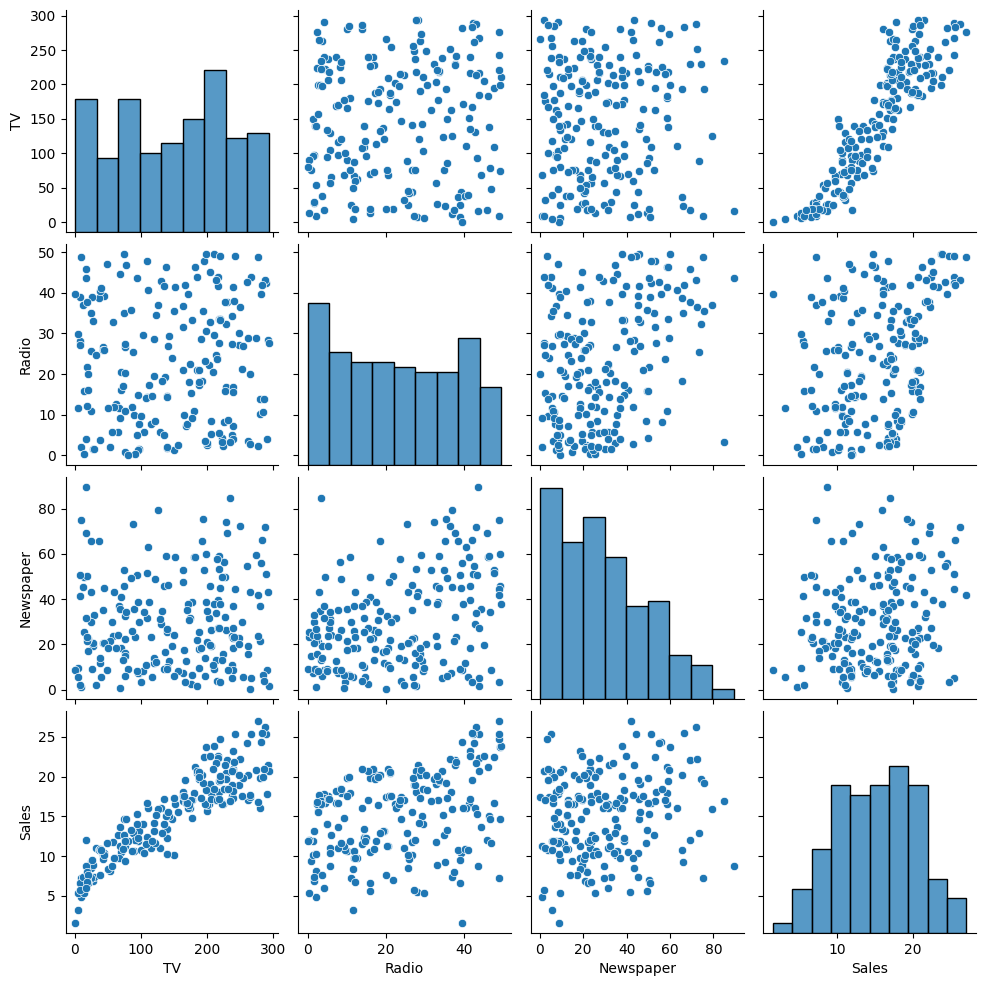

In [13]:
sns.pairplot(df)

#### Here, we can see TV and sales has the most positive linear correlation.

Lets visualize with regression line on each columns with Sales(Target variable)

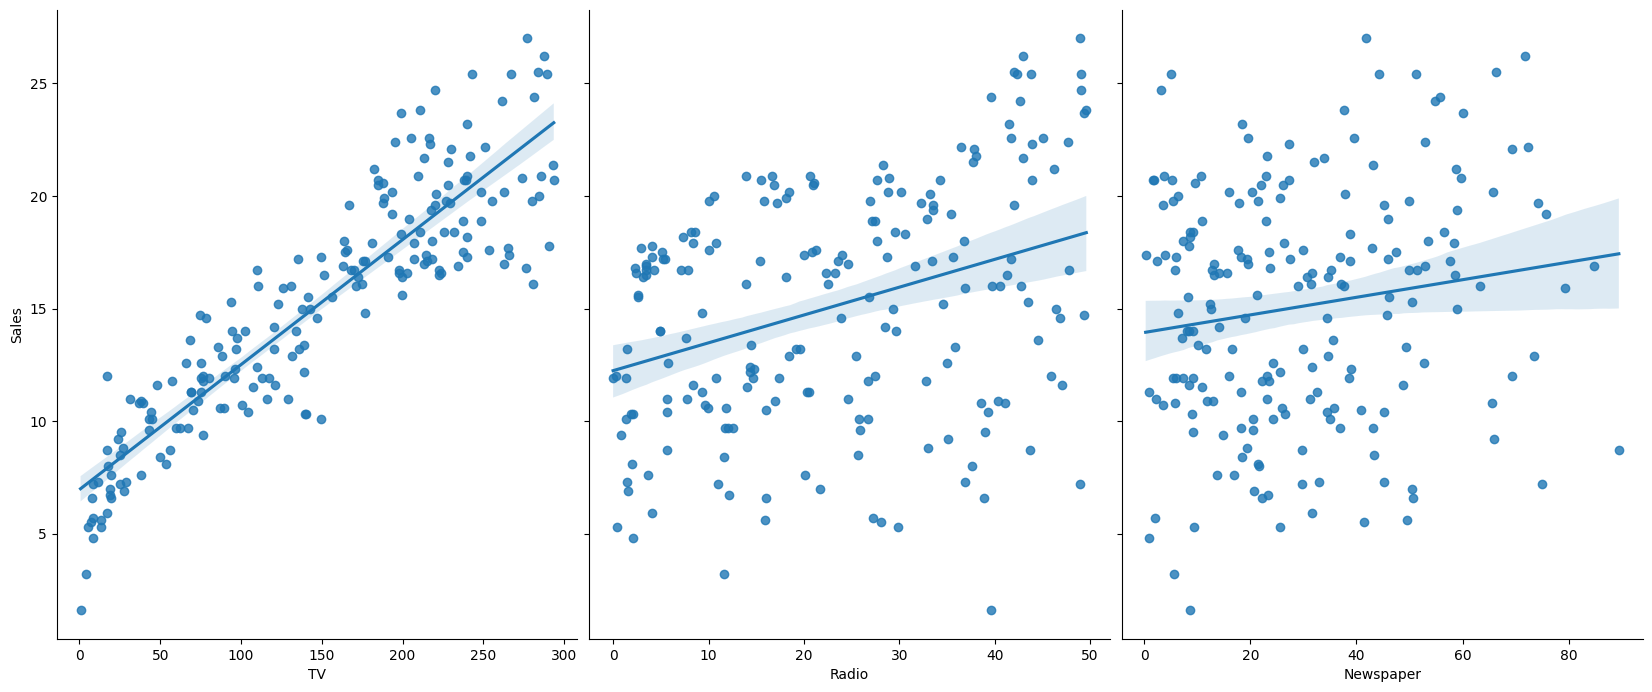

In [14]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.8, kind='reg')

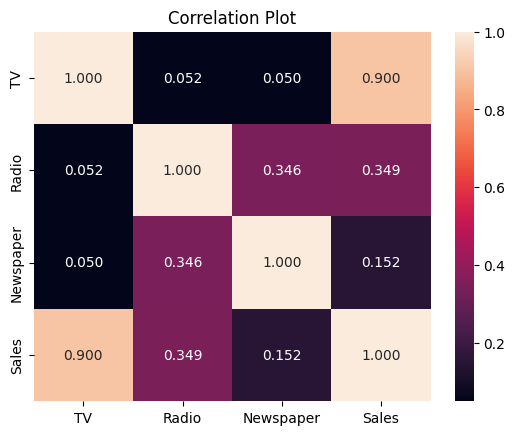

In [15]:
sns.heatmap(df.corr(), annot=True, fmt=".3f")
plt.title("Correlation Plot")
plt.show()

Here we can see, some positive correlation between the each columns tv,radio and newspaper  with sales. Where correaltion value
are 0.900, 0.349, 0.152 respectively. here we can see that Newspaper is least affecting factors in sales.

## Preparing Model

In [16]:
X = df[["TV","Radio","Newspaper"]]
y = df["Sales"]

In [17]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [18]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [21]:
X_train.head(5)

,TV,Radio,Newspaper
48,227.2,15.8,49.9
61,261.3,42.7,54.7
131,265.2,2.9,43.0
70,199.1,30.6,38.7
184,253.8,21.3,30.0


## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
linReg=LinearRegression()
linReg.fit(X_train,y_train)

LinearRegression()

In [23]:
#Getting the y-intercept and coefficients for tv, radio and newspaper respectively
print(linReg.intercept_)
print(linReg.coef_)

4.516093790452542
[0.05532372 0.10131602 0.00263087]


In [24]:
y_pred=linReg.predict(X_test)

In [25]:
print(y_pred)

[11.97244512 21.09739331 10.73273836 18.22720647 15.1701513  12.90245836
 12.33483098 12.99922835  9.28748848 20.18898696 14.10746739 20.46507579
 21.38564343 13.1823174   8.50595376 13.01415222 21.03370444 18.11447734
 19.54573699 13.46504664 17.84608309 17.79416247 14.73716578 19.18609197
 18.29519719 17.19280768 20.11954628 19.39728169 12.49419035 21.08654713
 10.60399095 11.50663239 22.00936806 18.84901479 20.81720794 20.29829643
  7.73484555 19.19769609  8.75695317  7.68161558 14.58562758 17.06865029
  9.02193401  6.25406074 18.06163038 14.04012489 10.88072848 16.70114944
 11.07837129 13.77401809 18.92766922 20.68060604 20.47837466 21.30279304
  8.82429177  9.1425703  17.30942059 21.33541559 20.68284585 15.76647853]


#### Evaluating the model
 Using RMSE:Root Mean Squared Error and R2_score

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("R2 score : %.2f" % r2_score(y_test,y_pred))

Mean squared error: 2.90
R2 score : 0.86


## RandomForestRegressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rfRegres=RandomForestRegressor()
rfRegres.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
y_pred_rf=rfRegres.predict(X_test)

In [31]:
print(y_pred_rf)

[11.543 17.788 10.478 18.39  13.978 14.031 11.987 15.413 10.53  19.807
 13.576 19.584 19.322 12.417  9.368 13.827 21.763 18.923 18.836 15.613
 18.038 17.195 15.916 18.281 17.238 16.4   17.284 19.287 11.89  19.932
 11.463 11.825 19.375 17.922 21.685 22.093  9.018 21.842  8.362  6.955
 16.157 19.144  6.459  7.448 18.423 12.917 10.114 19.146 11.022 14.38
 19.636 19.997 22.417 22.591 10.311 10.133 18.47  18.926 22.229 16.578]


Evaluating using Mean Squared Error, r2_score

In [32]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred_rf))
print("R2 score : %.2f" % r2_score(y_test,y_pred_rf))

Mean squared error: 1.65
R2 score : 0.92


Hyperparameter tuning

In [72]:
rfRegres_ht=RandomForestRegressor(n_estimators=200, max_depth=15)
rfRegres_ht.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=200)

In [73]:
y_pred_rfht=rfRegres_ht.predict(X_test)
print(y_pred_rfht)

[11.878  17.8565 10.446  18.3315 14.146  14.326  11.9385 15.1775 10.3215
 19.658  13.5125 19.591  19.2905 12.4775  9.193  13.9275 21.8525 18.5485
 18.7885 15.795  17.915  17.0195 16.1005 18.413  17.313  16.339  17.1335
 19.1325 12.4235 19.769  11.34   11.829  19.3265 17.9425 21.687  22.031
  9.0325 21.532   8.456   7.0475 16.305  18.9445  6.369   7.305  18.268
 13.0975 10.3365 19.2065 11.1735 14.787  19.5435 19.9615 22.157  22.489
 10.1605 10.0505 18.3605 18.892  22.07   16.4595]


In [74]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred_rfht))
print("R2 score : %.2f" % r2_score(y_test,y_pred_rfht))

Mean squared error: 1.59
R2 score : 0.93


#### It seems hyperparamater of n_estimators=200 and max_depth=15 give better results.

## XBoost Regressor

In [50]:
from xgboost.sklearn import XGBRegressor

In [51]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [52]:
y_pred_xgb = xgb_model.predict(X_test)

#### Evaluating the model

In [53]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred_xgb))
print("R2 score : %.2f" % r2_score(y_test,y_pred_xgb))

Mean squared error: 2.09
R2 score : 0.90


#### Tuning the parameters

In [54]:
xgb_model = XGBRegressor(n_estimators=50,max_depth=3,learning_rate=0.2)
xgb_model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [55]:
y_pred_xgb = xgb_model.predict(X_test)

In [56]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred_xgb))
print("R2 score : %.2f" % r2_score(y_test,y_pred_xgb))


Mean squared error: 1.65
R2 score : 0.92


#### Since, we have least Mean squared error(MSE) and highest R2 score for the RandomForestRegressor model.
#### We will use RandomForestRegressor model to predict sales.

#### i) Lower MSE values indicates that the model's predictions are closer to the actual values.
#### ii) Higher R2 score indicates a better fit of the regression model to the data.

## Prediction with RandomForestRegress Model

In [58]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Let's predict the 3rd row sales

In [76]:
inputs = {
    "TV": [151.5],
    "Radio": [41.3],
    "Newspaper": [158.5]
}

sales_prediction = rfRegres_ht.predict(pd.DataFrame(inputs))
print("Sales Predicted with RandomForestRegressor model:", sales_prediction[0])

Sales Predicted with RandomForestRegressor model: 17.42999999999999


#### Hence here, actual value is 16.5 and predicted value is 17.4 which is nearly accurate.